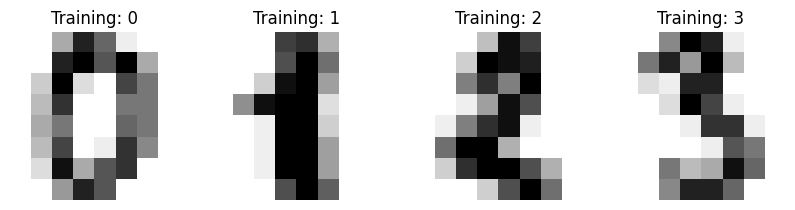

In [1]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [2]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)


In [3]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted, labels=digits.feature_names)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

   pixel_0_0       0.00      0.00      0.00         0
   pixel_0_1       0.00      0.00      0.00         0
   pixel_0_2       0.00      0.00      0.00         0
   pixel_0_3       0.00      0.00      0.00         0
   pixel_0_4       0.00      0.00      0.00         0
   pixel_0_5       0.00      0.00      0.00         0
   pixel_0_6       0.00      0.00      0.00         0
   pixel_0_7       0.00      0.00      0.00         0
   pixel_1_0       0.00      0.00      0.00         0
   pixel_1_1       0.00      0.00      0.00         0
   pixel_1_2       0.00      0.00      0.00         0
   pixel_1_3       0.00      0.00      0.00         0
   pixel_1_4       0.00      0.00      0.00         0
   pixel_1_5       0.00      0.00      0.00         0
   pixel_1_6       0.00      0.00      0.00         0
   pixel_1_7       0.00      0.00      0.00         0
   pixel_2_0       0.00   

/home/ace/work/JHU-AppliedML-EN705601-SP25/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ace/work/JHU-AppliedML-EN705601-SP25/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ace/work/JHU-AppliedML-EN705601-SP25/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd


bc = load_breast_cancer()
bc_df = pd.DataFrame(data= np.c_[bc.data, [bc.target_names[v] for v in bc.target]],
                     columns= list(bc.feature_names)+['cancer'])


X = bc_df.loc[:, bc_df.columns != 'cancer'].values
y = bc_df.loc[:, bc_df.columns == 'cancer'].values.ravel()

model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Mean Accuracy: {scores.mean()}, Standard Deviation: {scores.std()}")

Mean Accuracy: 0.9560937742586555, Standard Deviation: 0.02283883380490945
